# Exploratory Data Analysis - H1

Setup imports and dataframe

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns, pathlib as pl
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

TAG = "H1"                           # troque em cada notebook
LAB = pl.Path("..") / "data" / "labeled"
df  = pd.read_csv(LAB / f"{TAG}_labeled.csv")

print("Shape:", df.shape)
display(df.head())

Shape: (6400, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,labels
0,-4.0,-4.0,-3.087062e-17,-2.804005e-17,1.812312e-17,2.204437e-17,-3.399264e-17,4.128137e-17,5.047067e-17,3.087062e-17,...,1.0,1.0,1.0,1.0,1.0,-4.006133e-20,-4.006133e-20,1.0,1.0,2
1,-4.0,-3.9,-7.569585e-17,-1.699405e-17,-1.836671e-18,7.257061e-17,-2.978667e-18,-4.759653e-17,-4.493027e-17,7.569585e-17,...,1.0,1.0,1.0,1.0,1.0,9.503824e-20,9.503824e-20,1.0,1.0,2
2,-4.0,-3.8,-4.009680e-17,1.562325e-17,1.139196e-17,6.949868e-18,-1.379899e-17,-2.749054e-18,1.647056e-17,4.009680e-17,...,1.0,1.0,1.0,1.0,1.0,4.614040e-19,4.614040e-19,1.0,1.0,2
3,-4.0,-3.7,-8.024700e-18,-1.512383e-17,-1.918121e-17,2.929785e-17,-1.466281e-18,1.100192e-17,-1.183595e-17,8.024700e-18,...,1.0,1.0,1.0,1.0,1.0,-5.871858e-19,-5.871858e-19,1.0,1.0,2
4,-4.0,-3.6,-3.723576e-17,6.573393e-17,-3.152546e-17,-6.038016e-18,-1.838558e-17,2.705072e-17,1.443659e-17,3.723576e-17,...,1.0,1.0,1.0,1.0,1.0,1.714182e-19,1.714182e-19,1.0,1.0,2


## Checklist

Missing and dtype

In [5]:
print("Missing total:", df.isna().sum().sum())
print("\nTipos de dado:\n", df.dtypes.value_counts())


Missing total: 0

Tipos de dado:
 float64    27
int64       1
Name: count, dtype: int64


Data distribution

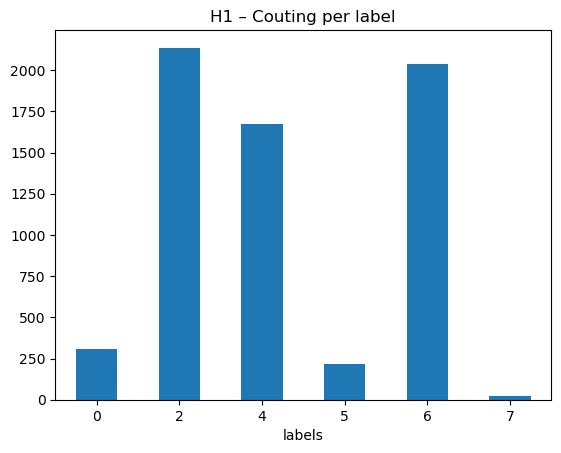

In [7]:
df["labels"].value_counts().sort_index().plot.bar(rot=0)
plt.title(f"{TAG} – Couting per label"); plt.show()


ANOTAÇÃO: Resolver o q fazer com esses dados? Oversampling? Excluir menores q 250?

## Statistics

In [8]:
desc = df.iloc[:,2:26].describe()      # 24 correlações
display(desc)

,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
count,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,...,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6.400000e+03,6.400000e+03,6.400000e+03
mean,-1.796909e-01,9.396443e-02,-7.072045e-02,5.858151e-02,-5.355650e-02,5.176201e-02,-5.356149e-02,-1.796519e-01,9.376210e-02,-7.046838e-02,...,-0.001575,0.623458,0.041509,0.620557,0.045655,0.619849,0.045656,1.951626e-02,1.951683e-02,5.889616e-01
std,1.815195e-01,1.371828e-01,1.228206e-01,1.151858e-01,1.118280e-01,1.106609e-01,1.118166e-01,1.813095e-01,1.372560e-01,1.242358e-01,...,0.786325,0.454540,0.769385,0.455207,0.768104,0.455605,0.768104,5.000067e-02,4.999941e-02,4.416928e-01
min,-1.617871e+00,-2.107196e-15,-5.215262e-01,-9.680004e-02,-5.209789e-01,-2.531672e-01,-5.209789e-01,-1.442498e+00,-5.800404e-01,-5.215262e-01,...,-1.745171,-0.098610,-1.234135,-0.064991,-1.009434,-0.055404,-1.005421,-7.677019e-16,-7.677019e-16,2.577384e-11
25%,-3.155162e-01,4.167082e-17,-7.983644e-02,2.253552e-17,-3.338443e-02,2.320614e-17,-3.338443e-02,-3.155162e-01,4.101457e-17,-7.967404e-02,...,-0.893083,0.000486,-0.849945,-0.000009,-0.848226,-0.000002,-0.848226,1.788809e-19,1.788809e-19,1.878870e-04
50%,-1.215939e-01,1.533759e-02,-3.859418e-03,7.456389e-04,-2.026930e-04,8.293292e-05,-2.026930e-04,-1.215939e-01,1.532271e-02,-3.855450e-03,...,-0.069493,0.939679,-0.004001,0.939123,-0.000736,0.939111,-0.000736,2.575886e-05,2.575886e-05,8.410694e-01
75%,-8.685933e-17,1.432976e-01,-2.929511e-17,4.730296e-02,-2.063333e-17,2.877102e-02,-2.367684e-17,-9.458836e-17,1.431678e-01,-2.621354e-17,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.169415e-03,5.169415e-03,1.000000e+00
max,6.959480e-15,6.405283e-01,1.207582e-15,5.211837e-01,2.171083e-01,5.209108e-01,1.851771e-01,1.375299e-14,5.245496e-01,1.435610e+00,...,1.000000,1.432990,1.000000,1.115246,1.000000,1.000000,1.000000,3.190785e-01,3.190785e-01,1.000000e+00


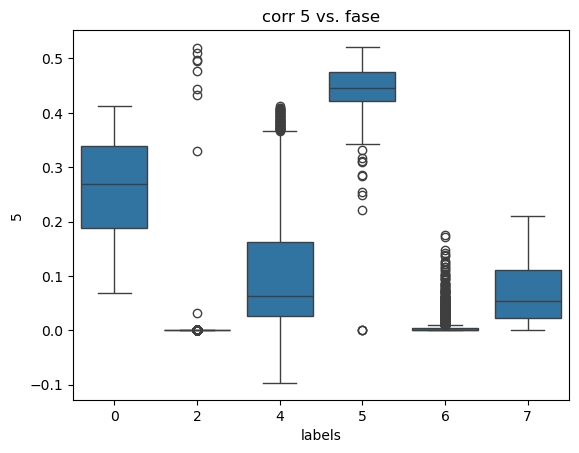

In [12]:
col_idx = 5                 # exemplo: 6.ª correlação (índice 0-based)
sns.boxplot(x=df["labels"], y=df.iloc[:, col_idx])
plt.title(f"corr {col_idx} vs. fase")
plt.show()

## Correlation matrix

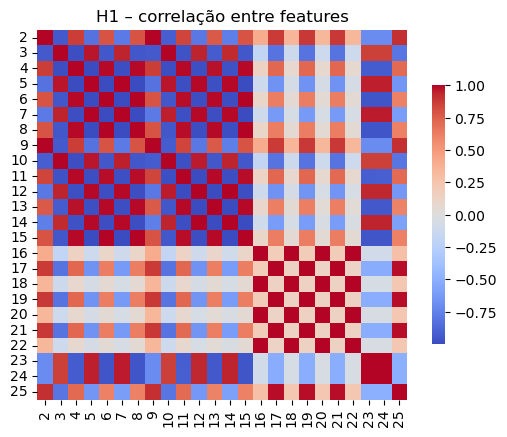

In [11]:
sns.heatmap(df.iloc[:,2:26].corr(), cmap="coolwarm", center=0,
            square=True, cbar_kws=dict(shrink=.7))
plt.title(f"{TAG} – correlação entre features"); plt.show()


## PCA pre-normalization

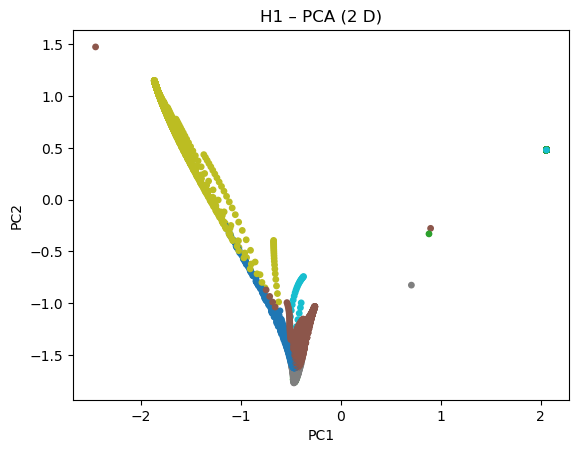

In [ ]:
pca = PCA(n_components=2, random_state=0).fit_transform(
        df.iloc[:,2:26].values)
plt.scatter(pca[:,0], pca[:,1], c=df["labels"], cmap="tab10", s=15)
plt.title(f"{TAG} – PCA (2 D)"); plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()
